In [49]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [50]:
a = 0.5
b = 0.3
n = 1000000
s = 990000
i = 7000
r = 3000
t0, tf = 0, 25

In [51]:
def dsdt(t, s):
    return - a * s


soln = solve_ivp(dsdt, (t0, tf), [s], dense_output=True)
soln

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f40e428f910>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None

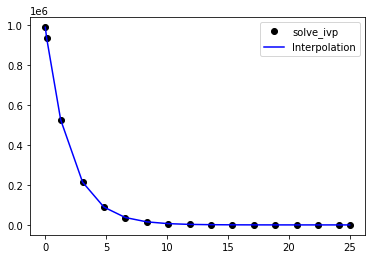

In [52]:
ts, ys = soln.t, soln.y[0]
zs, = soln.sol(ts)
plt.plot(ts, ys, 'o', color='k', label='solve_ivp')
plt.plot(ts, zs, color='blue', label='Interpolation')
plt.legend()
plt.show()

In [53]:
def didt(t, i):
    return a*s-b*i


soln_i = solve_ivp(didt, (t0, tf), [s], dense_output=True)
soln_i

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 44
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f40e44a84d0>
   status: 0
  success: True
        t: array([ 0.        ,  0.13797297,  1.51770263,  4.97982771,  8.72007351,
       13.35540218, 19.07569072, 25.        ])
 t_events: None
        y: array([[ 990000.        , 1016760.98281039, 1231393.32587885,
        1501598.09886133, 1601539.76277149, 1637757.4773589 ,
        1647624.98804697, 1649556.09016139]])
 y_events: None

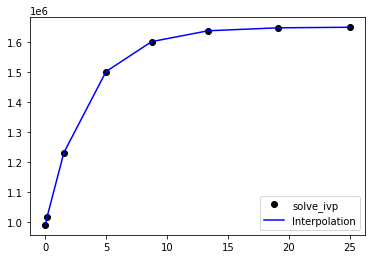

In [54]:
ti, yi = soln_i.t, soln_i.y[0]
zi, = soln_i.sol(ti)
plt.plot(ti, yi, 'o', color='k', label='solve_ivp')
plt.plot(ti, zi, color='blue', label='Interpolation')
plt.legend()
plt.show()

In [55]:
def drdt(t, r):
    return b*i


soln_r = solve_ivp(drdt, (t0, tf), [s], dense_output=True)
soln_r

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 20
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f40e4ac5450>
   status: 0
  success: True
        t: array([ 0.        ,  0.34251783,  3.7676961 , 25.        ])
 t_events: None
        y: array([[ 990000.        ,  990719.28743662,  997912.16180281,
        1042500.        ]])
 y_events: None

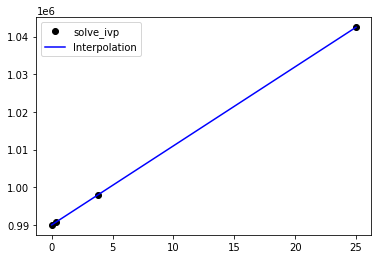

In [56]:
tr, yr = soln_r.t, soln_r.y[0]
zr, = soln_r.sol(tr)
plt.plot(tr, yr, 'o', color='k', label='solve_ivp')
plt.plot(tr, zr, color='blue', label='Interpolation')
plt.legend()
plt.show()

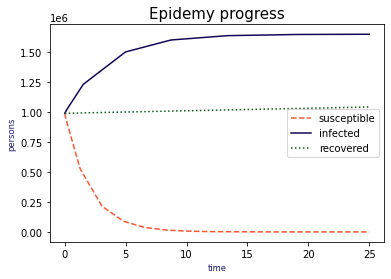

In [59]:
plt.plot(
    ts,
    zs,
    label="susceptible",
    linestyle="--",
    color="#FF5733",
)
plt.plot(
    ti,
    zi,
    label="infected",
    linestyle="-",
    color="#100658",
)
plt.plot(
    tr,
    zr,
    label="recovered",
    linestyle=":",
    color="#065812",
)
plt.xlabel("time", fontsize="small", color="midnightblue")
plt.ylabel("persons", fontsize="small", color="midnightblue")
plt.title("Epidemy progress", fontsize=15)
plt.legend()
plt.show()